# TFG

In [ ]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Testing split
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

testing the matrix build

In [ ]:
# read data
csv_hour_file = '../data/hour_14_metrics.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df = df[['Datetime', 'MarginalES']]

# Date range for the training matrix
train_start_date = '2018-01-01'
train_end_date = '2022-01-01'

train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]



##### 

# probar con eso tambien
# error de retorno con 0s
#! sumarle 0,001 a todo para que nunca sea 0
#! limpiar numeros negativos
    # subsanado con limpieza y posterior interpolacion

# benchmark 1 precios absolutos - precios CHECK
# benchmark 2 precios relativos - retornos CHECK
# benchmark 3 indicadores tecnicos
    # 1. media movil
    # 2. momentum
    # 3. RSI
    # 4. añdir los precios absolutos o relativos
# benchmark 4 random forest - probably not good because it doesn't detect peaks - hace medias, entonces nunca sale el valor mas bajo



# precios reales y precios relativos

# Sliding window size
window_size = 3

In [4]:
# Function to create sliding windows of data
def create_sliding_window(data, window_size):
    X, y = [], []  # Initialize lists for input features (X) and target values (y)
    
    for i in range(len(data) - window_size):
        # Extract a window of size 'window_size' from the data
        X.append(data.iloc[i:i+window_size, 1:].values.flatten())  
        
        # The label is the value right after the current window
        y.append(data.iloc[i + window_size, 1])  
    
    # Convert the lists to DataFrame/Series for easier use in training
    return pd.DataFrame(X), pd.Series(y)

In [5]:
# Create sliding window matrix
X_train, y_train = create_sliding_window(train_subset_df, window_size)

Print to check the matrix

In [6]:
# print the shape of the matrix
print(X_train.shape, y_train.shape)

# print the actual matrix
print(X_train.head())
print(y_train.head())

# Lasso
# .coef_ da los pesos del modelo lineal
# las que sean cero o muy bajitas no van a tener peso en la decision

(1459, 3) (1459,)
       0      1      2
0   2.30  48.02  52.00
1  48.02  52.00  48.19
2  52.00  48.19  52.02
3  48.19  52.02  52.07
4  52.02  52.07  54.07
0    48.19
1    52.02
2    52.07
3    54.07
4    69.42
dtype: float64


## Build a simple regression model and train with the matrix

In [7]:
# Build a simple regression model and train with the matrix
model_lr = LinearRegression()

# Train with the training subset
model_lr.fit(X_train, y_train)

#! en vez de score llamar a predict y guardar los valors

#! bucle for
# predict


# Fit with the next subset up to the row before prediction

# Date range for the testing (fit) matrix
test_start_date = '2022-01-02'
test_end_date = '2025-01-01'

test_subset_df = df[(df['Datetime'] >= test_start_date) & (df['Datetime'] <= test_end_date)]

# Create sliding window matrix
X_test, y_test = create_sliding_window(test_subset_df, window_size)

#! ERROR - you cannot fit the regression again with test data - its retraining the whole thing
#! Fit the model w test data
# model_lr.fit(X_test, y_test)

# llamar a fit con toda la matriz, con la anchura ventana deslizante
# y altura num of days back

#! me falta score con test
# llama a predict con la x y compara con mis ys
# guardar errores y predicciones
# std dev
# percentil

# pickle para guardar sets de numeros en vez de numpy ??

# Predict the target values
# y_pred = model_lr.predict(X) # SOLO la lonchita
# predict o score para otros modelos
y_pred = model_lr.predict(X_test) #! SOLO la lonchita ???
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

# mirar tambien Expectation Short-Fall
# mirar cual seria la peor prediccion
# la media del 5% peor de resultados
# buscar que el caso peor no sea tan malo?

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last = X_test.iloc[-1, :].values.reshape(1, -1)
y_pred = model_lr.predict(X_last)
# mse = mean_squared_error(y_test, y_pred)
print(f"x_last: {X_last}")
print(f"y_pred: {y_pred}")

# Calculate the mean squared error and R2 score
# mse = mean_squared_error(y, y_pred)
# print('Mean squared error:', mse)
# r2 = r2_score(y, y_pred)
# print('R2 score:', r2)

# # Print 20 y and y_pred to visualize the difference
# print('Actual vs Predicted')
# print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# # Plot the actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
# plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
# plt.legend()
# plt.show()

Test MSE: 1112.892958044297
x_last: [[110.01 108.88 116.02]]
y_pred: [112.48665834]


## Now with the return values

Pasos a seguir

Calcular el retorno (en vez de usar los precios)
Interpolar (rellenar valores)
Coger el set completo y partir en dos

Entrenar con la primera mitad (bloque 1 de datos)
    - Train

Coger todo el set de datos anterior a la fila que queremos (bloque 2 de datos)
    - Fit

Hacer predict de la siguiente fila al set de datos anterior (resultado a predecir)


In [ ]:
window_size = 30

# read return data
csv_hour_file = '../data/clean_return_data.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df = df[['Datetime', 'Return']]

# Date range for the training matrix
train_start_date = '2018-01-02'
train_end_date = '2022-01-01'

train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]

# Create sliding window matrix
X_train, y_train = create_sliding_window(train_subset_df, window_size)

# Build a simple regression model and train with the matrix
model_lr = LinearRegression()

# Train with the training subset
# model_lr.train(X_train, y_train)
model_lr.fit(X_train, y_train)


# Fit with the next subset up to the row before prediction

# Date range for the testing (fit) matrix
test_start_date = '2022-01-02'
test_end_date = '2025-01-01'

test_subset_df = df[(df['Datetime'] >= test_start_date) & (df['Datetime'] <= test_end_date)]

# Create sliding window matrix
X_test, y_test = create_sliding_window(test_subset_df, window_size)

#! no usar sólo la lonchita - usar toda la matriz de la que considere que tengo memoria
#! programar distintas ventanas fijas de memoria
#! mirar el error que dan las distintas memorias y comparar
y_pred = model_lr.predict(X_test) # SOLO la lonchita ??? NO error
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse}")

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last = X_test.iloc[-1, :].values.reshape(1, -1)
y_pred = model_lr.predict(X_last)
# mse = mean_squared_error(y_test, y_pred)
print(f"x_last: {X_last}")
print(f"y_pred: {y_pred}")

Test MSE: 192605.69284437993
x_last: [[ 2.17391304e-01  1.60714286e-01  3.53846154e-03 -1.68250805e-01
  -8.75495346e-03 -6.37783563e-02 -9.67030785e-01 -8.67469880e-01
   7.75000000e+00  2.89246753e+01  5.54639354e-02  1.43092105e-01
  -8.92086331e-03 -2.16390825e-01 -2.97637795e-01  2.71828014e-01
   1.03702167e-01 -1.50051677e-01 -2.21755472e-01  2.18892045e-01
  -5.83032281e-01 -5.70150922e-01 -7.84135241e-01  9.77710843e+00
   1.43991056e+00  2.06185567e-01  2.50712251e-02  1.91773207e-02
  -1.02717935e-02  6.55767818e-02]]
y_pred: [0.6227191]


In [9]:
# For later on...
#! Build a simple random forest model and train with the matrix

# model_rf = sklearn RandomForest()
# model_rf.fit(X, y)

# # llamar a fit con toda la matriz, con la anchura ventana deslizante
# # y altura num of days back

# # Predict the target values
# y_pred = model_rf.predict(X)

# # llamar a predict con solo una fila (ancho)

# # Calculate the mean squared error and R2 score
# mse = mean_squared_error(y, y_pred)
# print('Mean squared error:', mse)
# r2 = r2_score(y, y_pred)
# print('R2 score:', r2)

# # Print 20 y and y_pred to visualize the difference
# print('Actual vs Predicted')
# print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# # Plot the actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
# plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
# plt.legend()
# plt.show()

## Añadiendo columnas
Calcularemos varias metricas con la libreria "ta" - technical analysis

### Próximos pasos
- Añadir columnas de métricas de precios
  - Media móvil corta (a pocos días)
  - Media móvil larga (a muchos días)
  - RSI
  - Volatilidad
  - Momentum
- Probar regresión otra vez
- Verificar con
  - MSE
  - RMSE
  - 95th percentil
  - R² modificado?
- Mirar foto - usar en el sumatorio de abajo, las etiquetas de train
- Probar Lasso
- Mirar error (distintas métricas)
- Mirar pesos que escoge - aprender del modelo


In [10]:
# Añadir columnas de metricas de precios
    # media movil corta (a pocos dias)
    # media movil larga (a muchos dias)
    # RSI
    # volatilidad
    # momentum

# probar regresion otra vez
    # verificar con
    # mse
    # rmse
    # 95th percentil

# R^2 modificado?
# mirar foto - usar en el sumatorio de abajo, las etiquetas de train

window_size = 30

# read prices data
csv_hour_file = '../data/ta_metrics/new_price_metrics_hour_14.csv'
# read return data
# csv_hour_file = '../data/ta_metrics/new_return_metrics_hour_14.csv'

df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

# split in two
# Train
# Test

#! Expandir esto para incluir nuevas metricas (mas columnas)
df_prices = df[['Datetime', 'MarginalES']]
# df = df[['Datetime', 'Return']] #! esto no vale

# Select all relevant columns except 'Datetime'
feature_columns = df.columns[1:]  # Exclude 'Datetime'
df = df[['Datetime'] + list(feature_columns)]

In [11]:
print(df_prices)

                Datetime  MarginalES
0    2018-07-18 14:00:00       66.76
1    2018-07-19 14:00:00       66.69
2    2018-07-20 14:00:00       66.30
3    2018-07-21 14:00:00       64.21
4    2018-07-22 14:00:00       62.21
...                  ...         ...
2289 2025-02-09 14:00:00       70.00
2290 2025-02-10 14:00:00      116.52
2291 2025-02-11 14:00:00      107.50
2292 2025-02-12 14:00:00       78.00
2293 2025-02-13 14:00:00       83.50

[2294 rows x 2 columns]


In [12]:
print(df)

                Datetime  MarginalES       SMA_3   SMA_5      SMA_7  SMA_10  \
0    2018-07-18 14:00:00       66.76   65.866667  64.728  65.518571  65.402   
1    2018-07-19 14:00:00       66.69   66.796667  65.458  65.288571  65.576   
2    2018-07-20 14:00:00       66.30   66.583333  66.118  65.232857  65.735   
3    2018-07-21 14:00:00       64.21   65.733333  66.180  65.400000  65.583   
4    2018-07-22 14:00:00       62.21   64.240000  65.234  65.287143  64.974   
...                  ...         ...         ...     ...        ...     ...   
2289 2025-02-09 14:00:00       70.00   71.780000  68.106  77.925714  69.065   
2290 2025-02-10 14:00:00      116.52   80.506667  84.370  79.935714  76.220   
2291 2025-02-11 14:00:00      107.50   98.006667  87.872  80.650000  86.450   
2292 2025-02-12 14:00:00       78.00  100.673333  85.404  86.764286  84.750   
2293 2025-02-13 14:00:00       83.50   89.666667  91.104  85.837143  82.855   

         SMA_30   SMA_50     SMA_60  SMA_100   SMA_

In [ ]:
# Function to create the weight matrix, with the sliding window, and the columns of extra data points

# Right Alligned
# x1 x2 x3 sma_3
# sma_3 = x1+x2+x3 / 3
def create_sliding_window_more_columns(dataframe, window_size):
    X, y = [], []
    
    df_prices = dataframe[['Datetime', 'MarginalES']]
    df_features = dataframe.iloc[:, 2:]  # Exclude 'Datetime' and 'MarginalES'
    
    for i in range(window_size, len(df_prices)):
        # Extract sliding window for prices (right-aligned)
        window = df_prices.iloc[i-window_size:i, 1:].values.flatten()
        
        # Extract corresponding feature row
        feature_row = df_features.iloc[i-1].values.flatten()
        
        # Concatenate sliding window prices with feature row
        X.append(np.concatenate((window, feature_row)))
        y.append(df_prices.iloc[i, 1])
    
    return pd.DataFrame(X), pd.Series(y)

X_0313, y_0313 = create_sliding_window_more_columns(df, window_size=3)

print(X_0313)

          0       1       2           3       4          5       6   \
0      66.76   66.69   66.30   66.583333  66.118  65.232857  65.735   
1      66.69   66.30   64.21   65.733333  66.180  65.400000  65.583   
2      66.30   64.21   62.21   64.240000  65.234  65.287143  64.974   
3      64.21   62.21   66.90   64.440000  65.262  65.715714  64.995   
4      62.21   66.90   68.81   65.973333  65.686  65.982857  65.572   
...      ...     ...     ...         ...     ...        ...     ...   
2286   89.99   90.34   55.00   78.443333  74.606  81.497143  62.066   
2287   90.34   55.00   70.00   71.780000  68.106  77.925714  69.065   
2288   55.00   70.00  116.52   80.506667  84.370  79.935714  76.220   
2289   70.00  116.52  107.50   98.006667  87.872  80.650000  86.450   
2290  116.52  107.50   78.00  100.673333  85.404  86.764286  84.750   

             7        8          9        10        11         12         13  \
0     63.368000  61.9490  62.487167  57.6258  53.72930  65.248139  

In [14]:
print(y_0313)

0        64.21
1        62.21
2        66.90
3        68.81
4        68.02
         ...  
2286     70.00
2287    116.52
2288    107.50
2289     78.00
2290     83.50
Length: 2291, dtype: float64


In [20]:
# Build a simple regression model and train with the matrix
model_lr_0313 = LinearRegression()

# Split X and y in half for training and testing
split_idx = len(X_0313) // 2
X_train_0313, X_test_0313 = X_0313.iloc[:split_idx], X_0313.iloc[split_idx:]
y_train_0313, y_test_0313 = y_0313.iloc[:split_idx], y_0313.iloc[split_idx:]

# Train with the training subset
model_lr_0313.fit(X_train_0313, y_train_0313)

# testing this
y_pred_0313 = model_lr_0313.predict(X_test_0313) #! SOLO la lonchita ???
mse = mean_squared_error(y_test_0313, y_pred_0313)
print(f"Test MSE: {mse}")

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313 = X_test_0313.iloc[-1, :].values.reshape(1, -1)
y_pred_0313 = model_lr_0313.predict(X_last_0313)
# mse = mean_squared_error(y_0313, y_pred_0313)
print(f"x_last_0313: {X_last_0313}")
print(f"y_pred_0313: {y_pred_0313}")

Test MSE: 1273.7688078227593
x_last_0313: [[116.52       107.5         78.         100.67333333  85.404
   86.76428571  84.75        78.063       80.167       77.066
   80.697       62.92195     78.95981936  74.69171023  73.44896598
  117.99888206  48.0708806   49.9585821   50.45825696]]
y_pred_0313: [85.0033699]


## Lasso
- mirar error (distintas metricas)
- mirar pesos que escoge - aprender del modelo

In [ ]:
# Añadir columnas de metricas de precios
    # media movil corta (a pocos dias)
    # media movil larga (a muchos dias)
    # RSI
    # volatilidad
    # momentum

# probar regresion otra vez
    # verificar con
    # mse
    # rmse
    # 95th percentil

# R^2 modificado?
# mirar foto - usar en el sumatorio de abajo, las etiquetas de train

# read prices data
csv_hour_file = '../data/ta_metrics/new_price_metrics_hour_14.csv'

df_lasso = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_lasso_prices = df_lasso[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_lasso.columns[1:]  # Exclude 'Datetime'
df_lasso = df_lasso[['Datetime'] + list(feature_columns)]

In [59]:
X_0313_lasso, y_0313_lasso = create_sliding_window_more_columns(df_lasso, window_size=3)

In [60]:
# Build a simple regression model and train with the matrix
model_lasso_0313 = Lasso()

# split in two
# Train
# Test

# Split X and y in half for training and testing
split_idx = len(X_0313_lasso) // 2
X_train_0313_lasso, X_test_0313_lasso = X_0313_lasso.iloc[:split_idx], X_0313_lasso.iloc[split_idx:]
y_train_0313_lasso, y_test_0313_lasso = y_0313_lasso.iloc[:split_idx], y_0313_lasso.iloc[split_idx:]

print(X_test_0313_lasso)

# Train with the training subset
model_lasso_0313.fit(X_train_0313_lasso, y_train_0313_lasso)

# testing this
y_pred_0313_lasso = model_lasso_0313.predict(X_test_0313_lasso) #! SOLO la lonchita ???
mse = mean_squared_error(y_test_0313_lasso, y_pred_0313_lasso)
print(f"Test MSE: {mse}")

#! Pending on 95th, 99th percentile errors ???

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313_lasso = X_test_0313_lasso.iloc[-1, :].values.reshape(1, -1)
# y_actual_0313_lasso = X_test_0313_lasso.
y_pred_0313_lasso = model_lasso_0313.predict(X_last_0313_lasso)
# mse = mean_squared_error(y_0313_lasso, y_pred_0313_lasso)
print(f"x_last_0313_lasso: {X_last_0313_lasso}")
# print(f"y_actual_0313_lasso: {y_actual_0313_lasso}")
print(f"y_pred_0313_lasso: {y_pred_0313_lasso}")

          0       1       2           3        4           5        6   \
1145  106.25  126.40  108.84  113.830000  117.640  123.154286  121.305   
1146  126.40  108.84  129.48  121.573333  116.934  122.370000  124.556   
1147  108.84  129.48  144.80  127.706667  123.154  123.211429  126.531   
1148  129.48  144.80  150.00  141.426667  131.904  125.638571  128.636   
1149  144.80  150.00  142.56  145.786667  135.136  129.761429  129.395   
...      ...     ...     ...         ...      ...         ...      ...   
2286   89.99   90.34   55.00   78.443333   74.606   81.497143   62.066   
2287   90.34   55.00   70.00   71.780000   68.106   77.925714   69.065   
2288   55.00   70.00  116.52   80.506667   84.370   79.935714   76.220   
2289   70.00  116.52  107.50   98.006667   87.872   80.650000   86.450   
2290  116.52  107.50   78.00  100.673333   85.404   86.764286   84.750   

              7         8           9        10        11          12  \
1145  112.369000  104.3964  101.757500

In [94]:
# Get the coefficients (weights)
print(model_lasso_0313.coef_)

# Get the intercept (bias term)
print(model_lasso_0313.intercept_)

[ 3.21050495e-02 -6.25027368e-02  5.77208048e-01  0.00000000e+00
 -6.52493599e-01  1.18267860e+00 -1.92864278e-01 -0.00000000e+00
  1.26183475e-01  0.00000000e+00  0.00000000e+00 -1.53922496e-02
 -0.00000000e+00 -0.00000000e+00  1.78668335e-04  1.93220358e-04
  9.70789337e-04  0.00000000e+00 -0.00000000e+00]
0.3690443970770616


## Ridge

In [63]:
# read prices data
csv_hour_file = '../data/ta_metrics/new_price_metrics_hour_14.csv'

df_ridge = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_ridge_prices = df_ridge[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_ridge.columns[1:]  # Exclude 'Datetime'
df_ridge = df_ridge[['Datetime'] + list(feature_columns)]

X_0313_ridge, y_0313_ridge = create_sliding_window_more_columns(df_ridge, window_size=3)

In [66]:
# Build a simple regression model and train with the matrix
model_ridge_0313 = Ridge()

# split in two
# Train
# Test

# Split X and y in half for training and testing
split_idx = len(X_0313_ridge) // 2
X_train_0313_ridge, X_test_0313_ridge = X_0313_ridge.iloc[:split_idx], X_0313_ridge.iloc[split_idx:]
y_train_0313_ridge, y_test_0313_ridge = y_0313_ridge.iloc[:split_idx], y_0313_ridge.iloc[split_idx:]

print(X_test_0313_ridge)

# Train with the training subset
model_ridge_0313.fit(X_train_0313_ridge, y_train_0313_ridge)

# testing this
y_pred_0313_ridge = model_ridge_0313.predict(X_test_0313_ridge) # SOLO la ultima fila
mse = mean_squared_error(y_test_0313_ridge, y_pred_0313_ridge)
print(f"Test MSE: {mse}")

#! Pending on 95th, 99th percentile errors ???


# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313_ridge = X_test_0313_ridge.iloc[-1, :].values.reshape(1, -1)
# y_actual_0313_ridge = X_test_0313_ridge.
y_pred_0313_ridge = model_ridge_0313.predict(X_last_0313_ridge)
# mse = mean_squared_error(y_0313_ridge, y_pred_0313_ridge)
print(f"x_last_0313_ridge: {X_last_0313_ridge}")
# print(f"y_actual_0313_ridge: {y_actual_0313_ridge}")
print(f"y_pred_0313_ridge: {y_pred_0313_ridge}")

          0       1       2           3        4           5        6   \
1145  106.25  126.40  108.84  113.830000  117.640  123.154286  121.305   
1146  126.40  108.84  129.48  121.573333  116.934  122.370000  124.556   
1147  108.84  129.48  144.80  127.706667  123.154  123.211429  126.531   
1148  129.48  144.80  150.00  141.426667  131.904  125.638571  128.636   
1149  144.80  150.00  142.56  145.786667  135.136  129.761429  129.395   
...      ...     ...     ...         ...      ...         ...      ...   
2286   89.99   90.34   55.00   78.443333   74.606   81.497143   62.066   
2287   90.34   55.00   70.00   71.780000   68.106   77.925714   69.065   
2288   55.00   70.00  116.52   80.506667   84.370   79.935714   76.220   
2289   70.00  116.52  107.50   98.006667   87.872   80.650000   86.450   
2290  116.52  107.50   78.00  100.673333   85.404   86.764286   84.750   

              7         8           9        10        11          12  \
1145  112.369000  104.3964  101.757500

In [93]:
# Get the coefficients (weights)
print(model_ridge_0313.coef_)

# Get the intercept (bias term)
print(model_ridge_0313.intercept_)

[ 1.14506950e-01 -1.71326093e-02  6.96877913e-01  2.64750752e-01
 -9.79866198e-01  2.22622712e+00 -5.36522891e-01 -7.99610894e-01
  2.06161320e-01 -4.14652061e-01  9.56655580e-02 -9.01933216e-02
 -2.59030503e+00  2.80837751e+00  2.39819399e-04  1.07971772e-04
  1.21296606e+00 -2.31801833e+00  1.24141251e+00]
-5.916886008529133


In [83]:
# # Scatter plot of actual vs predicted values
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test_0313_ridge, y_pred_0313_ridge, alpha=0.5, color="blue", label="Predicted vs Actual")
# plt.plot([min(y_test_0313_ridge), max(y_test_0313_ridge)], [min(y_test_0313_ridge), max(y_test_0313_ridge)], color="red", linestyle="dashed", label="Perfect Fit")
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Random Forest: Predictions vs Actual")
# plt.legend()
# plt.grid(True)
# plt.show()


## Random Forest

In [67]:
# read prices data
csv_hour_file = '../data/ta_metrics/new_price_metrics_hour_14.csv'

df_randomforest = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_randomforest_prices = df_randomforest[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_randomforest.columns[1:]  # Exclude 'Datetime'
df_randomforest = df_randomforest[['Datetime'] + list(feature_columns)]

X_0313_randomforest, y_0313_randomforest = create_sliding_window_more_columns(df_randomforest, window_size=3)

In [ ]:
# Split data
X_train_0313_randomforest, X_test_0313_randomforest, y_train_0313_randomforest, y_test_0313_randomforest = train_test_split(X_0313_randomforest, y_0313_randomforest, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_0313_randomforest, y_train_0313_randomforest)

# Predictions
X_last_0313_randomforest = X_test_0313_randomforest.iloc[-1, :].values.reshape(1, -1)
y_pred_0313_randomforest = rf.predict(X_test_0313_randomforest)
print(f"x_last_0313_randomforest: {X_last_0313_randomforest}")
print(f"y_pred_0313_randomforest: {y_pred_0313_randomforest}")

# Evaluate model
mse = mean_squared_error(y_test_0313_randomforest, y_pred)
r2 = r2_score(y_test_0313_randomforest, y_pred)

print(f"Random Forest MSE: {mse:.4f}")
print(f"Random Forest R²: {r2:.4f}")

#! Pending on 95th, 99th percentile errors ???

x_last_0313_randomforest: [[ 51.4         66.01        76.5         64.63666667  69.736
   72.03571429  68.395       63.31766667  53.9356      51.58333333
   43.7401      45.90875     68.50230757  64.08042486   2.
  659.68222443  58.85956519  57.11168805  55.31417178]]
y_pred_0313_randomforest: [2.668110e+01 1.893950e+02 1.524533e+02 6.793420e+01 3.227800e+01
 8.871580e+01 7.448160e+01 3.598320e+01 4.214440e+01 5.416030e+01
 3.731170e+01 7.184650e+01 4.768690e+01 3.447400e+01 4.756060e+01
 5.267390e+01 1.748124e+02 3.875030e+01 8.782440e+01 2.926670e+01
 1.539689e+02 2.169429e+02 4.555330e+01 4.350180e+01 1.042685e+02
 3.704100e+01 9.587420e+01 1.178999e+02 4.732730e+01 1.316260e+02
 3.404070e+01 6.608660e+01 3.702100e+01 5.388120e+01 1.642142e+02
 2.638730e+01 9.305480e+01 8.009870e+01 3.761630e+01 1.265781e+02
 1.832607e+02 7.402410e+01 5.039310e+01 5.532020e+01 3.841170e+01
 1.030890e+02 3.771580e+01 1.249326e+02 1.953523e+02 9.218210e+01
 5.156570e+01 1.190578e+02 4.896770e+01 3.85

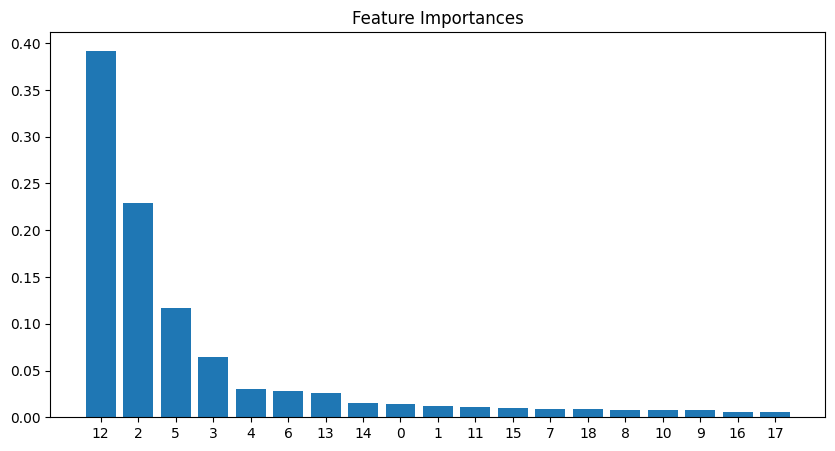

In [82]:
# Get feature importance
feature_importance = rf.feature_importances_

# Sort and plot
indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_0313_randomforest.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X_0313_randomforest.shape[1]), indices)
plt.show()

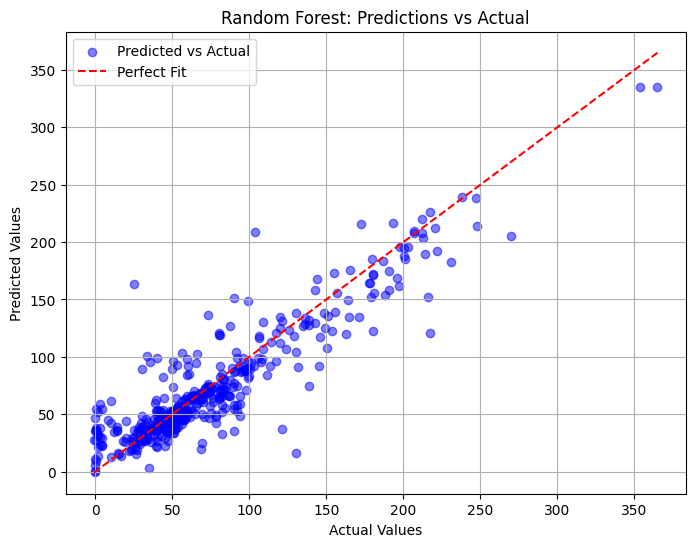

In [77]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_0313_randomforest, y_pred_0313_randomforest, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test_0313_randomforest), max(y_test_0313_randomforest)], [min(y_test_0313_randomforest), max(y_test_0313_randomforest)], color="red", linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()


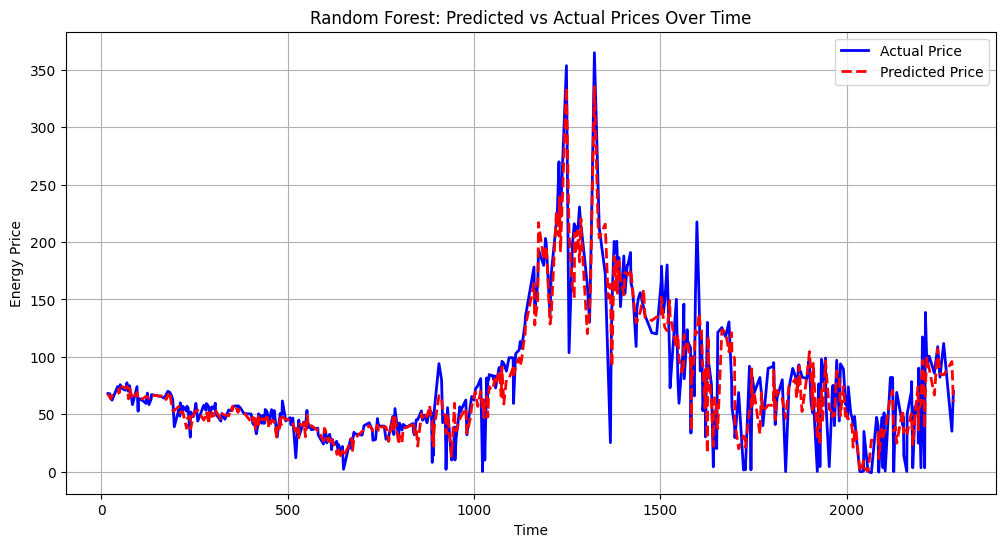

In [ ]:
# Assuming X_test has a DateTime index or a corresponding time column
time_series = X_test_0313_randomforest.index if isinstance(X_test_0313_randomforest, pd.DataFrame) else range(len(y_test_0313_randomforest))

# Sort values by time (just in case)
sorted_indices = np.argsort(time_series)
time_series_sorted = np.array(time_series)[sorted_indices]
y_test_sorted = np.array(y_test)[sorted_indices]
y_pred_sorted = np.array(y_pred)[sorted_indices]

# Plot actual vs predicted over time
plt.figure(figsize=(12, 6))
plt.plot(time_series_sorted, y_test_sorted, label="Actual Price", color="blue", linewidth=2)
plt.plot(time_series_sorted, y_pred_sorted, label="Predicted Price", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Energy Price")
plt.title("Random Forest: Predicted vs Actual Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Random forest tiende a suavizar
# No es capaz de predecir el pico

# En mi caso es mas importante saber la tendencia



# crear un detector de picos en los datos
# error total y error sin picos


# menos honesto
# windsorizar los datos - meter todo entre el percentil 5 y el percentil 95


# Entrenar sin picos? suavizar sin picos

# problema de regresion lineal y train linea con outliers


# Expectation short fall of 95th percentile

# la media de los dias que está mal, cuanto nos la vamos a pegar

# rolling window de pandas y mirar como alinear

# SMA_180 o 182 - 30 dias? 

# SMA 3 4 7 esta bien, pero mas mejor 14 - 30 - 60 - 90 - 180 - 360

# esto depende del horizonte

## XGBoost

In [ ]:
# Train XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"XGBoost R²: {r2_xgb:.4f}")

#! Pending on 95th, 99th percentile errors ???

XGBoost MSE: 611.9240
XGBoost R²: 0.8007


## LightGBM

In [ ]:
# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Define model parameters
params = {
    "objective": "regression",
    "metric": "rmse",
    "num_leaves": 31,
    "learning_rate": 0.1,
    "verbose": -1
}

# Train with early stopping using callbacks
lgbm = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_test],
    callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)]  # Correct usage
)

# Make predictions
y_pred_lgb = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)

# Evaluate performance
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f"LightGBM MSE: {mse_lgb:.4f}")


Training until validation scores don't improve for 10 rounds
[10]	valid_0's rmse: 29.6384
[20]	valid_0's rmse: 24.1266
[30]	valid_0's rmse: 23.7829
Early stopping, best iteration is:
[29]	valid_0's rmse: 23.6901
LightGBM MSE: 561.2210


## XGBoost vs LightGBM performance

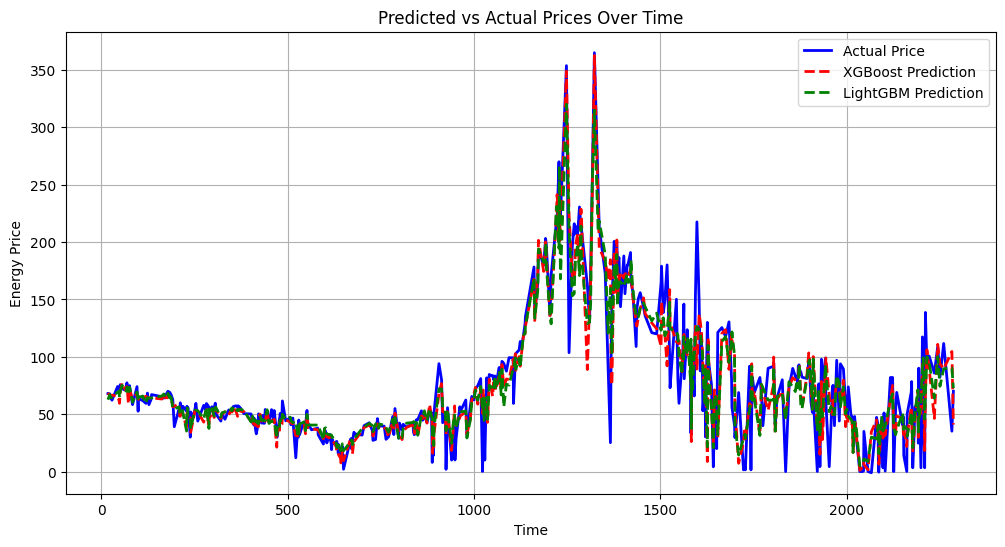

In [ ]:
plt.figure(figsize=(12, 6))

plt.plot(time_series_sorted, y_test_sorted, label="Actual Price", color="blue", linewidth=2)
plt.plot(time_series_sorted, y_pred_xgb[sorted_indices], label="XGBoost Prediction", color="red", linestyle="dashed", linewidth=2)
plt.plot(time_series_sorted, y_pred_lgb[sorted_indices], label="LightGBM Prediction", color="green", linestyle="dashed", linewidth=2)

plt.xlabel("Time")
plt.ylabel("Energy Price")
plt.title("Predicted vs Actual Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()


## Peak analysis

In [ ]:
# Analyze how many peaks, how many outliers
